### Visualization after preprocessing

In [1]:
import pandas as pd

df = pd.read_csv("cnn_news_articles_final_cleaned.csv")
df.head()

df['text'] = df['text'].astype(str)
df['headline'] = df['headline'].astype(str)

Visualize how many articles published based on months and years

In [2]:
import plotly.express as px

# load the dataset
file_path = 'cnn_news_articles_final_cleaned.csv'
data = pd.read_csv(file_path)

# convert Date published column to datetime
data['Date_published_dt'] = pd.to_datetime(data['date published'], errors='coerce')
data['Year'] = data['Date_published_dt'].dt.year
data['Month'] = data['Date_published_dt'].dt.month

# aggregate publication count by month and year
publication_by_month = data.groupby(['Year', 'Month']).size().reset_index(name='Counts')

# plot the news publication with all years using Plotly
fig = px.line(publication_by_month, x='Month', y='Counts', color='Year',
              markers=True, title='News Articles Publication (All Years)',
              labels={'Month': 'Month', 'Counts': 'Number of News Articles Published'},
              color_discrete_sequence=px.colors.qualitative.T10)

# update layout to adjust legend
fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),
    legend_title='Year',
    legend=dict(x=1.05, y=1),
    margin=dict(r=150)
)

# show the plot
fig.show()


Visualize length of text in each category of news

In [3]:
# add new column length of the each article of news column
df['length']=df['text'].apply(len)

# add new column of word count of each article
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df.head(2)

date published category  \
0  2021-07-15 02:46:59     news   
1  2021-05-12 07:52:09     news   

                                            headline  \
0      shortage trucker simple think solution driver   
1  servo iron hand could protect factory worker i...   

                                                text sentiment  \
0  right shortage truck driver commerce boom brou...  negative   
1  working factory warehouse mean task repetition...  negative   

   sentiment_score  length  word_count  
0             -1.0    7129        1050  
1             -1.0    3469         498

In [4]:
# total number of words present in the whole corpus
Total_words=sum(df['word_count'])
Total_words

18286182

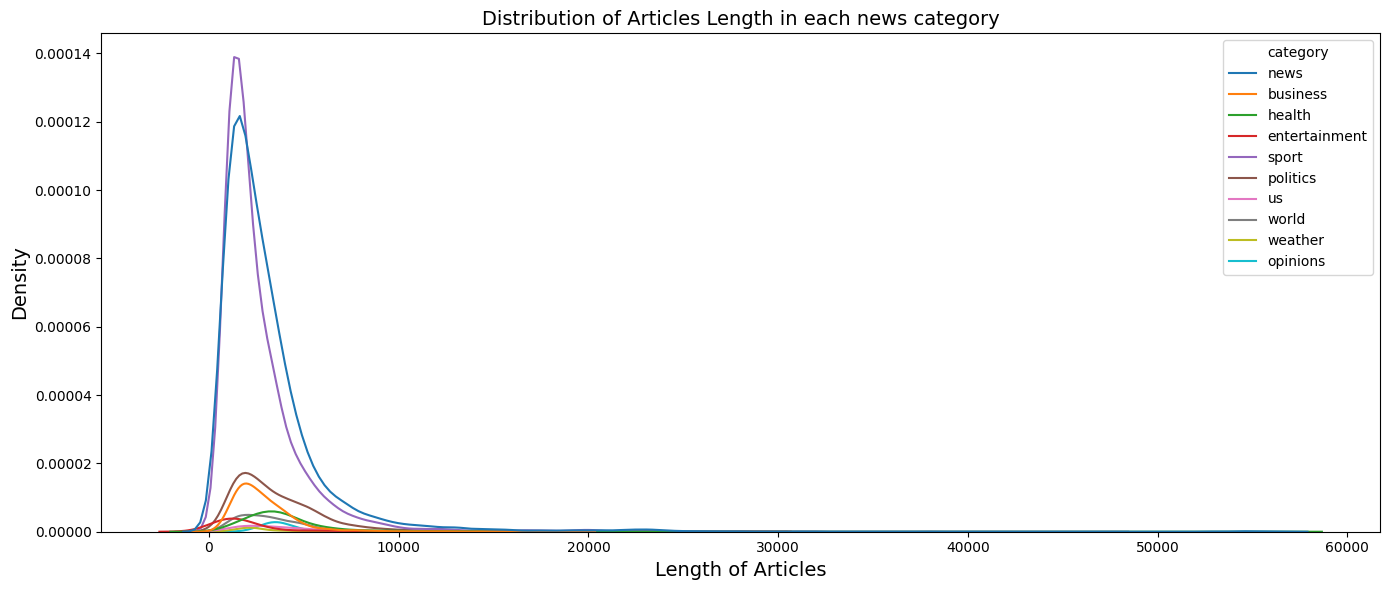

In [5]:
# distribution of text Length of different news type
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(14,6))
sns.kdeplot(data=df, x=df['length'], hue=df['category'])
plt.title('Distribution of Articles Length in each news category', color='black', fontsize=14)
plt.xlabel('Length of Articles', color='black', fontsize=14)
plt.ylabel('Density', color='black', fontsize=14)
plt.tight_layout()
plt.show()

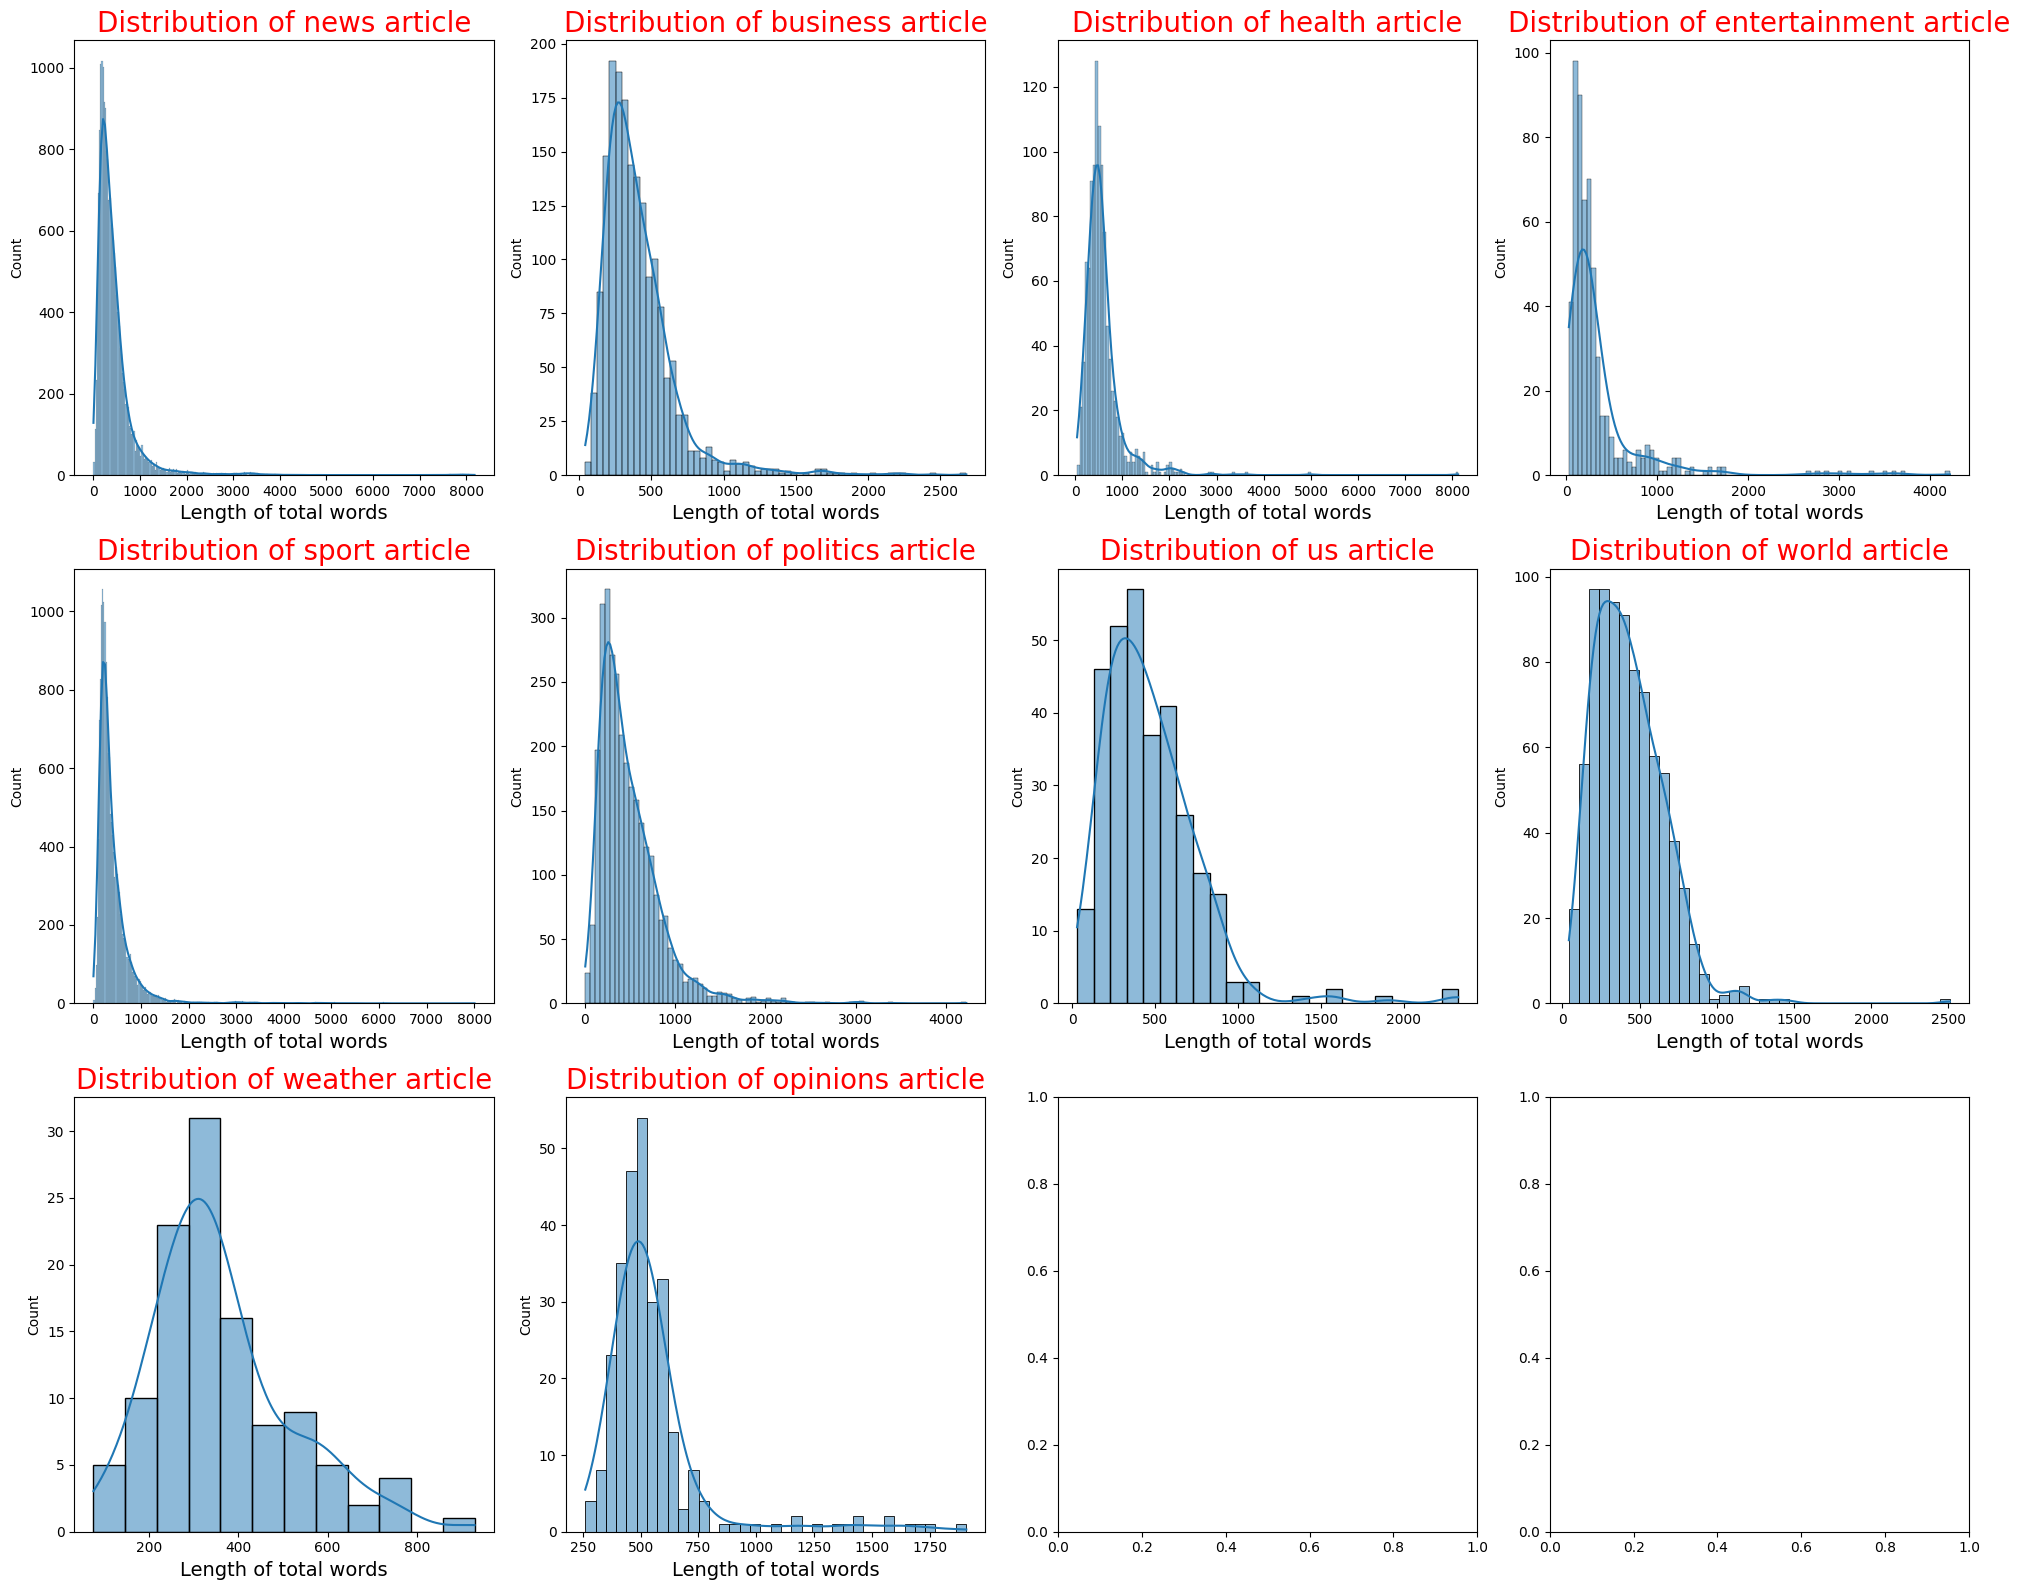

In [6]:
types_article = df['category'].unique()

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))

axs = axs.flatten()

for i, article in enumerate(types_article):
    ax = axs[i]
    sns.histplot(x=df[df['category'] == article]['word_count'], kde=True, ax=ax)
    ax.set_title(f'Distribution of {article} article', size=20, color='red')
    ax.set_xlabel('Length of total words', fontsize=14, color='black')

plt.tight_layout()
plt.show()

Word Frequency (Overall Categories)

In [7]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Joe
[nltk_data]     Chok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Word Frequency on Article Text column only (Top 10)

C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_7340\3701774566.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




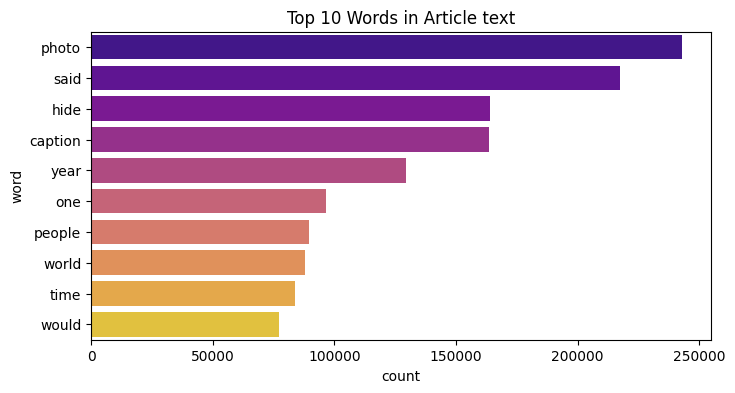

In [8]:
# tokenize using NLTK
corpus = [word_tokenize(text) for text in df['text']]

# flatten the list of tokens
corpus_flat = [word for sublist in corpus for word in sublist]

# compute word frequencies 
word_freq = FreqDist(corpus_flat)

# convert FreqDist 
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'count']).sort_values(by='count', ascending=False)


plt.figure(figsize=(8,4))
sns.barplot(x='count',y='word',data=word_freq_df.head(10), palette='plasma')
plt.title('Top 10 Words in Article text')
plt.show()

Word Frequency on Headline column only (Top 10)

C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_7340\3461646925.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




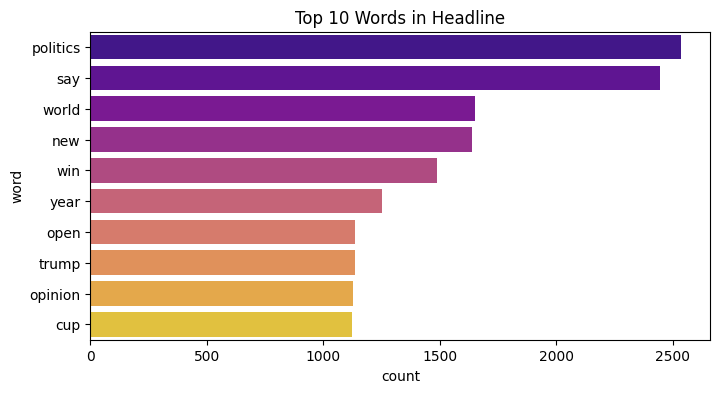

In [9]:
# tokenize using NLTK
corpus2 = [word_tokenize(text) for text in df['headline']]

# flatten the list of tokens
corpus_flat2 = [word for sublist in corpus2 for word in sublist]

# compute word frequencies 
word_freq2 = FreqDist(corpus_flat2)

# convert FreqDist 
word_freq_df2 = pd.DataFrame(list(word_freq2.items()), columns=['word', 'count']).sort_values(by='count', ascending=False)


plt.figure(figsize=(8,4))
sns.barplot(x='count',y='word',data=word_freq_df2.head(10), palette='plasma')
plt.title('Top 10 Words in Headline')
plt.show()

Word Cloud (Overall Categories)

In [10]:
from wordcloud import WordCloud
all_text = ' '.join(df['text'])
all_headline = ' '.join(df['headline'])

Word Cloud on Article text column only

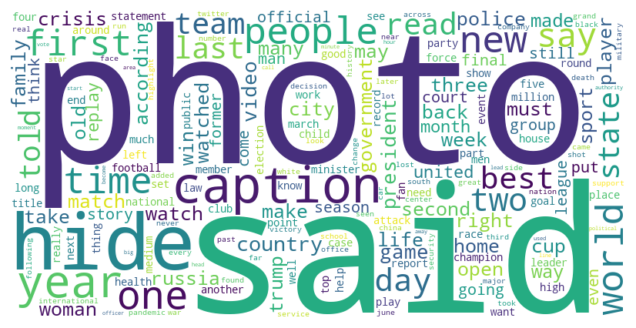

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(all_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud on Headline column only

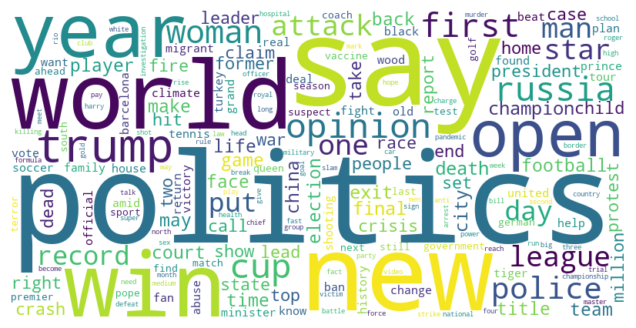

In [12]:
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(all_headline)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for Each Categories

Word Cloud on Article Text column only (Each Categories)

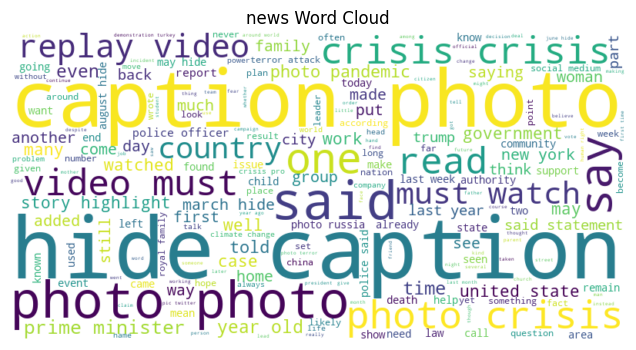

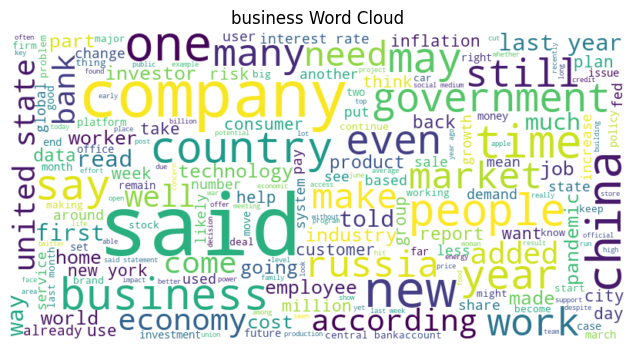

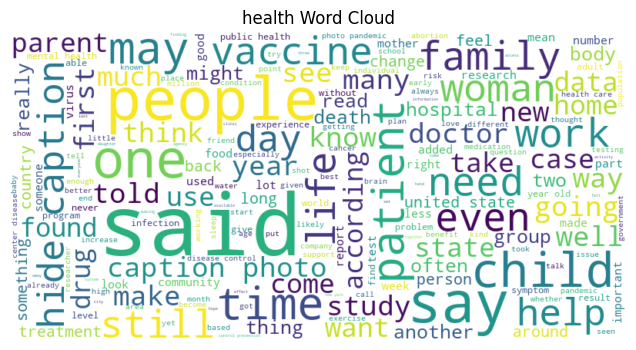

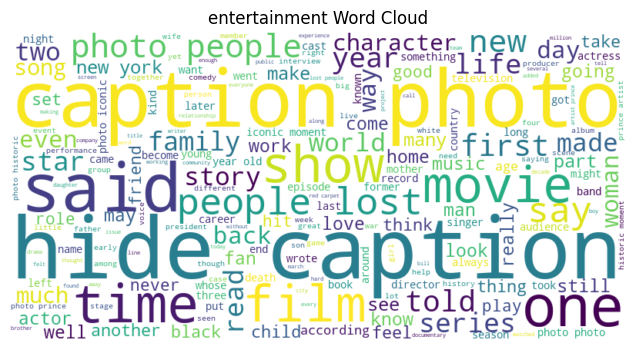

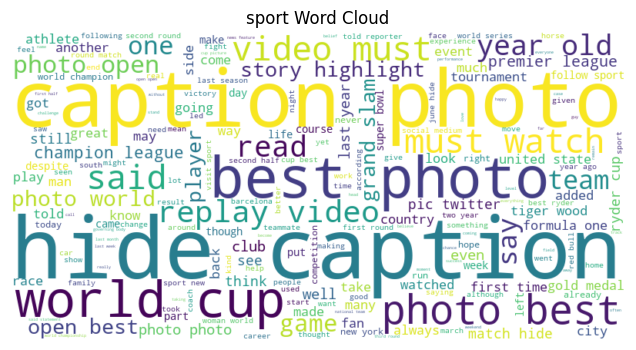

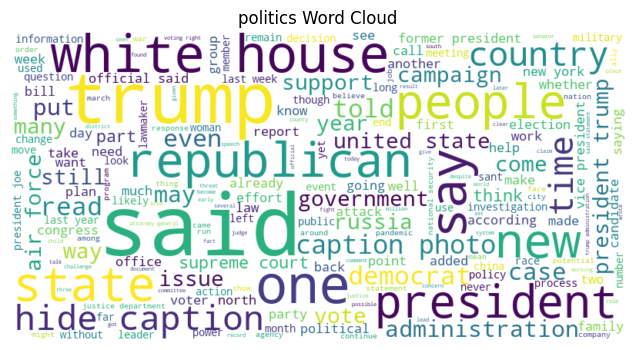

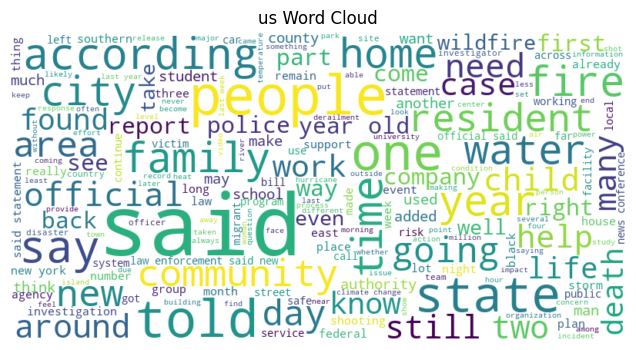

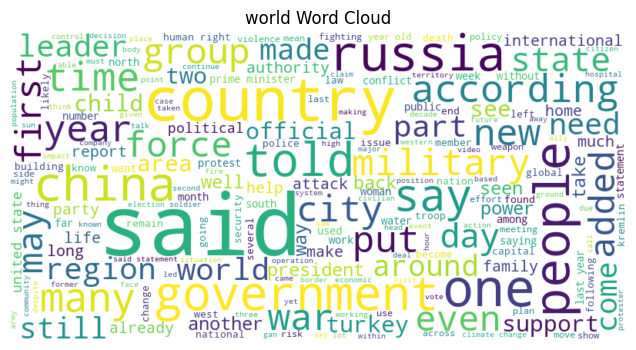

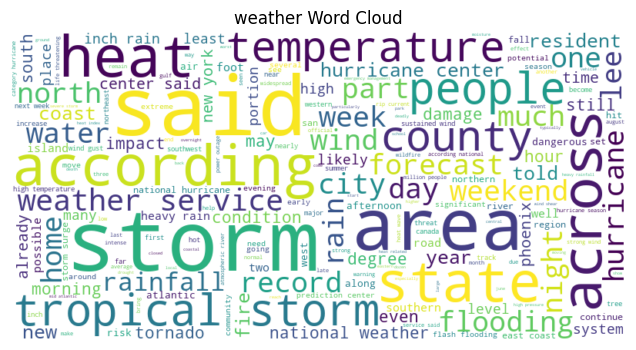

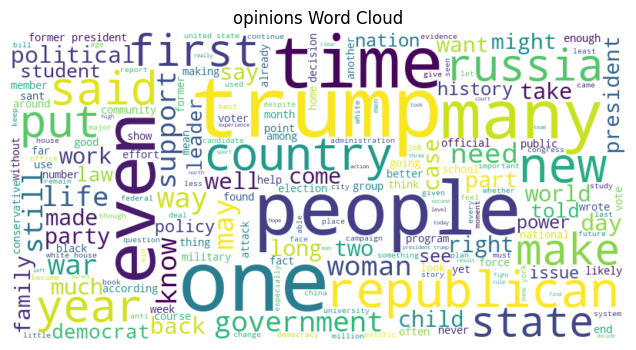

In [13]:
from wordcloud import WordCloud

# define function of generate word clouds for each topic to visualize

def generate_wordclouds(df, category):
    for topic_category in category:
        allWords = ' '.join([topic for topic in df[df['category']==topic_category]['text']])
        wordCloud = WordCloud(width=800, height=400, background_color="white", random_state=21, max_font_size=110).generate(allWords)
        plt.figure(figsize=(8,4))
        plt.imshow(wordCloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(topic_category + ' Word Cloud')
        plt.show()


# apply the function

category = ['news', 'business', 'health', 'entertainment', 'sport', 'politics', 'us' , 'world' , 'weather' , 'opinions']
generate_wordclouds(df, category)        

Word Cloud on Headline column only (Each Categories)

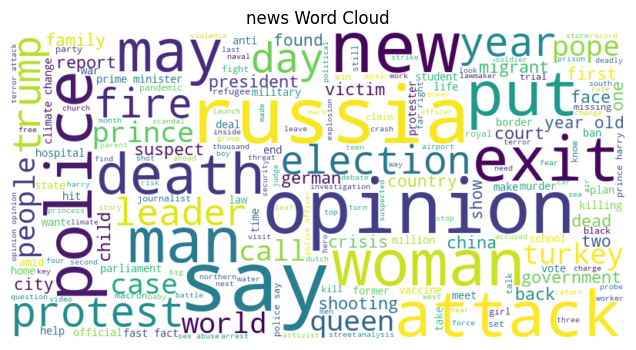

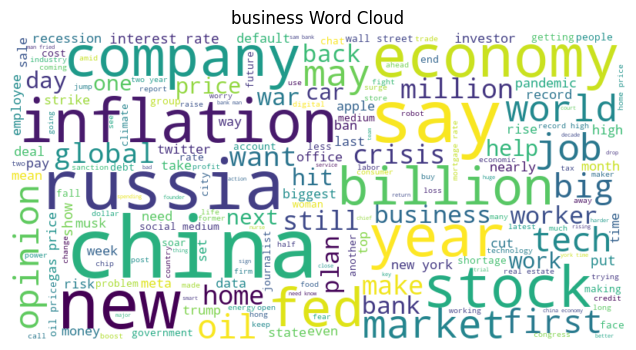

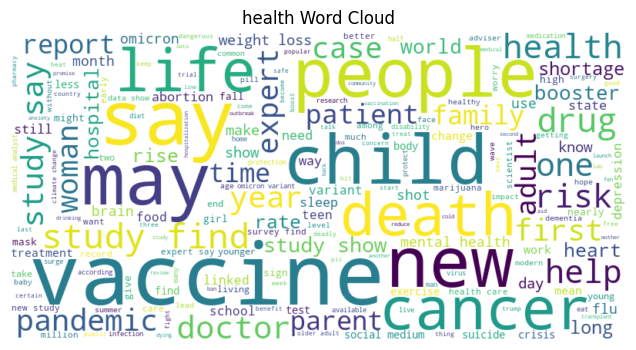

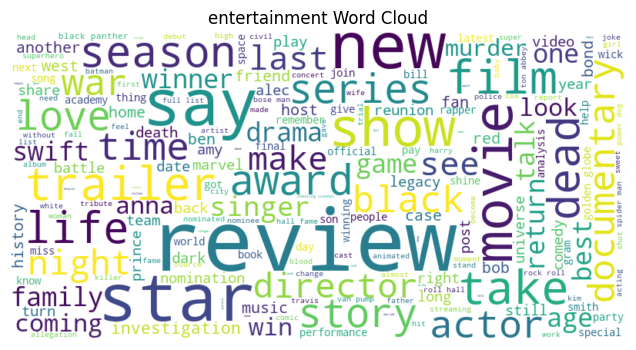

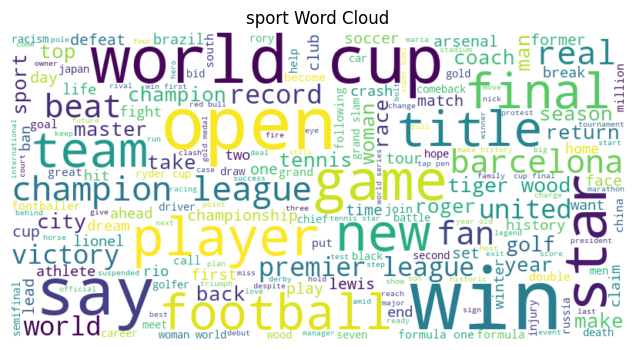

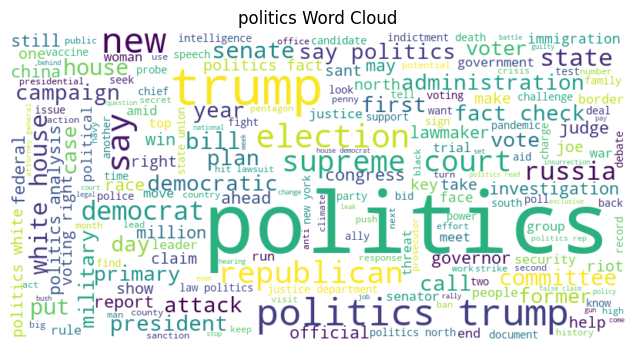

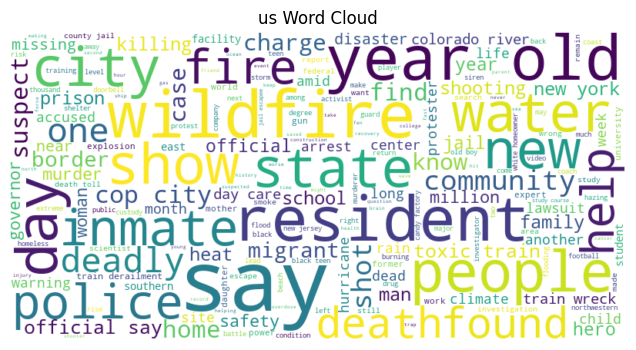

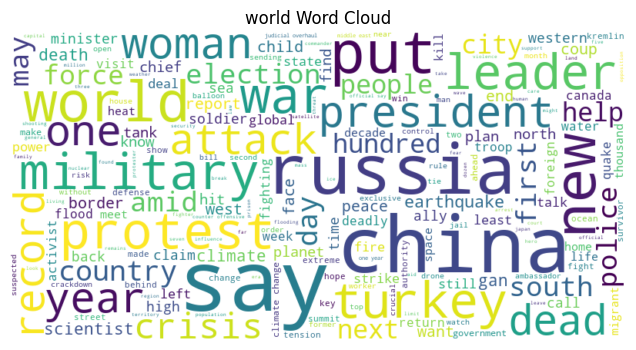

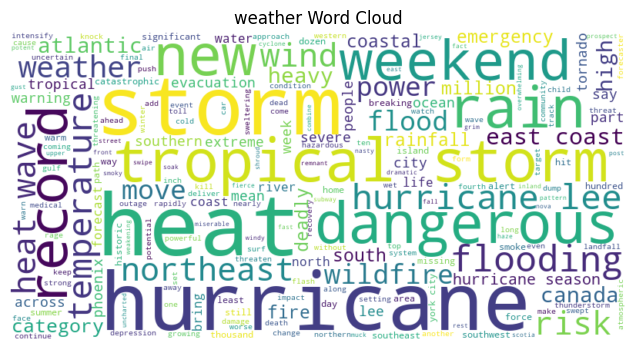

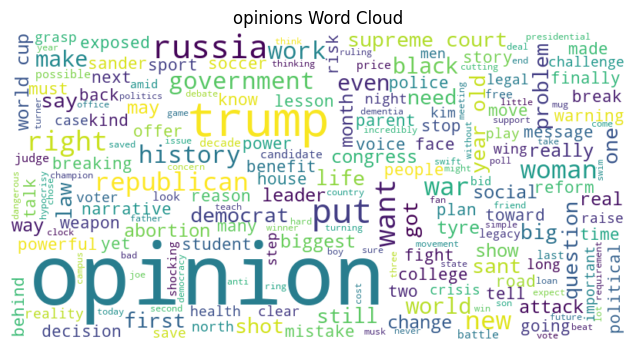

In [14]:
from wordcloud import WordCloud

# define function of generate word clouds for each topic to visualize

def generate_wordclouds(df, category):
    for topic_category in category:
        allWords = ' '.join([topic for topic in df[df['category']==topic_category]['headline']])
        wordCloud = WordCloud(width=800, height=400, background_color="white", random_state=21, max_font_size=110).generate(allWords)
        plt.figure(figsize=(8,4))
        plt.imshow(wordCloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(topic_category + ' Word Cloud')
        plt.show()


# apply the function

category = ['news', 'business', 'health', 'entertainment', 'sport', 'politics', 'us' , 'world' , 'weather' , 'opinions']
generate_wordclouds(df, category)        

N-gram Exploration (Overall Categories)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_7340\893468743.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: >

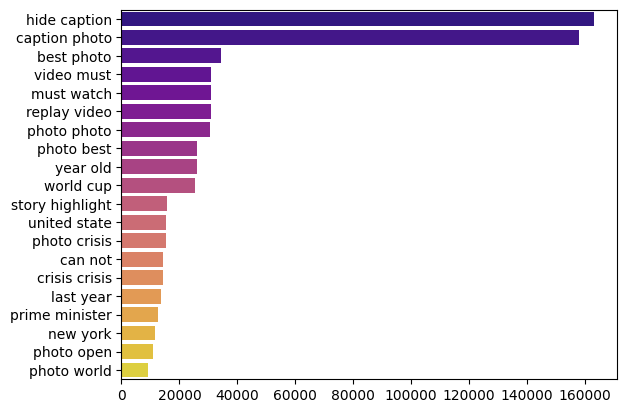

In [16]:
def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams=_get_top_ngram(df['text'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y, y=x, palette='plasma')

C:\Users\Joe Chok\AppData\Local\Temp\ipykernel_7340\515122745.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: >

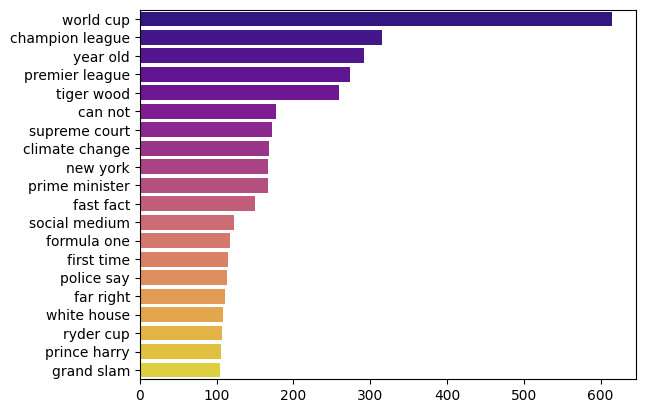

In [17]:
def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams=_get_top_ngram(df['headline'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y, y=x, palette='plasma')